## Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data

In [210]:
grade_g =pd.read_csv('gameandgrade.csv')

In [212]:
grade_g.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.5
1,1,1,1,3,1,1,1,3,3,83.0
2,0,1,0,0,0,0,1,3,3,80.0
3,0,1,3,5,1,1,2,2,3,45.0
4,1,1,1,1,2,1,1,3,4,85.0


In [214]:
grade_g.describe()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,0.498701,4.944156,1.584416,2.242857,1.488312,0.706494,1.837662,3.718182,3.410390,77.518870
std,0.500323,2.999913,1.407306,1.923635,1.337853,0.458509,1.064077,1.171756,1.176447,16.511119
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.250000,65.000000
50%,0.000000,4.000000,1.000000,2.000000,1.000000,1.000000,2.000000,4.000000,3.000000,80.000000
75%,1.000000,8.000000,3.000000,4.000000,2.000000,1.000000,2.000000,5.000000,4.000000,90.000000
max,1.000000,11.000000,4.000000,5.000000,5.000000,2.000000,4.000000,6.000000,6.000000,100.000000


In [216]:
grade_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               770 non-null    int64  
 1   School Code       770 non-null    int64  
 2   Playing Years     770 non-null    int64  
 3   Playing Often     770 non-null    int64  
 4   Playing Hours     770 non-null    int64  
 5   Playing Games     770 non-null    int64  
 6   Parent Revenue    770 non-null    int64  
 7   Father Education  770 non-null    int64  
 8   Mother Education  770 non-null    int64  
 9   Grade             770 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 60.3 KB


## Check for any missing data

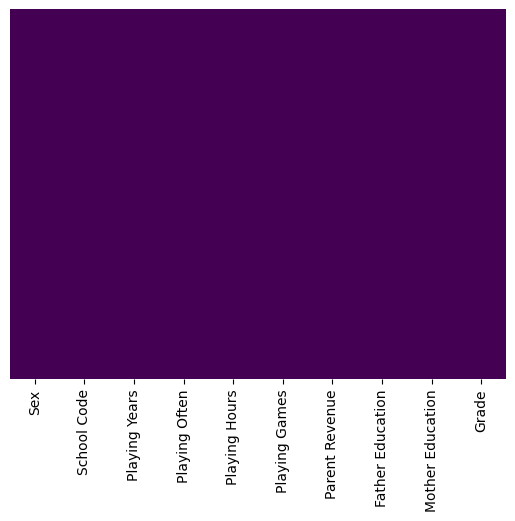

In [218]:
sns.heatmap(grade_g.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

**There's no missing data**

## Exploratory Data Analysis

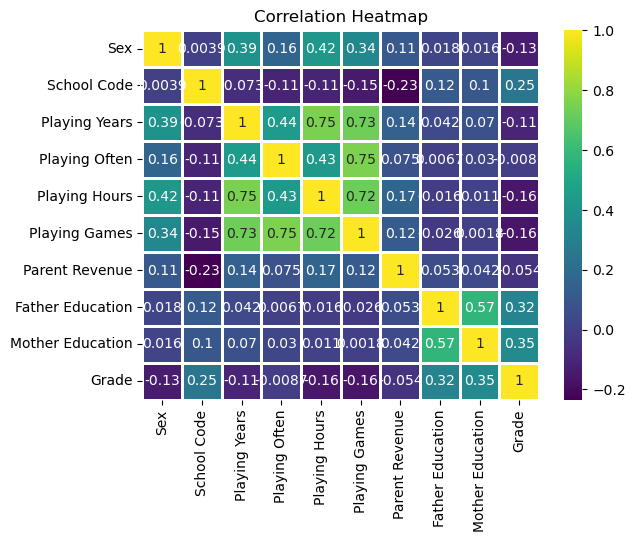

In [248]:

sns.heatmap(grade_g.corr(),cmap='viridis',annot=True,linewidths=True)
plt.title('Correlation Heatmap')
plt.show()

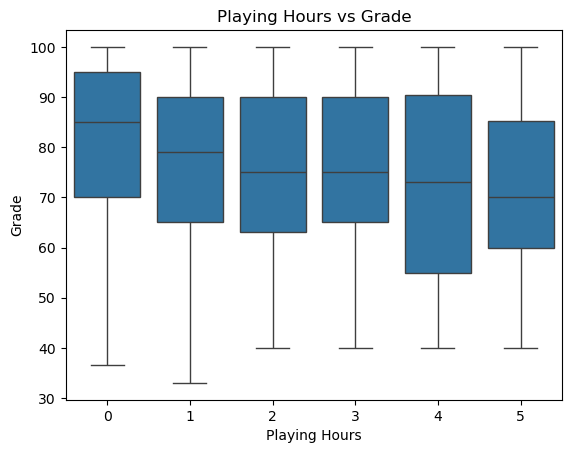

Text(0.5, 1.0, 'Playing Hours vs Grade')

In [226]:
sns.boxplot(grade_g,x='Playing Hours',y='Grade')
plt.show()
plt.title('Playing Hours vs Grade')

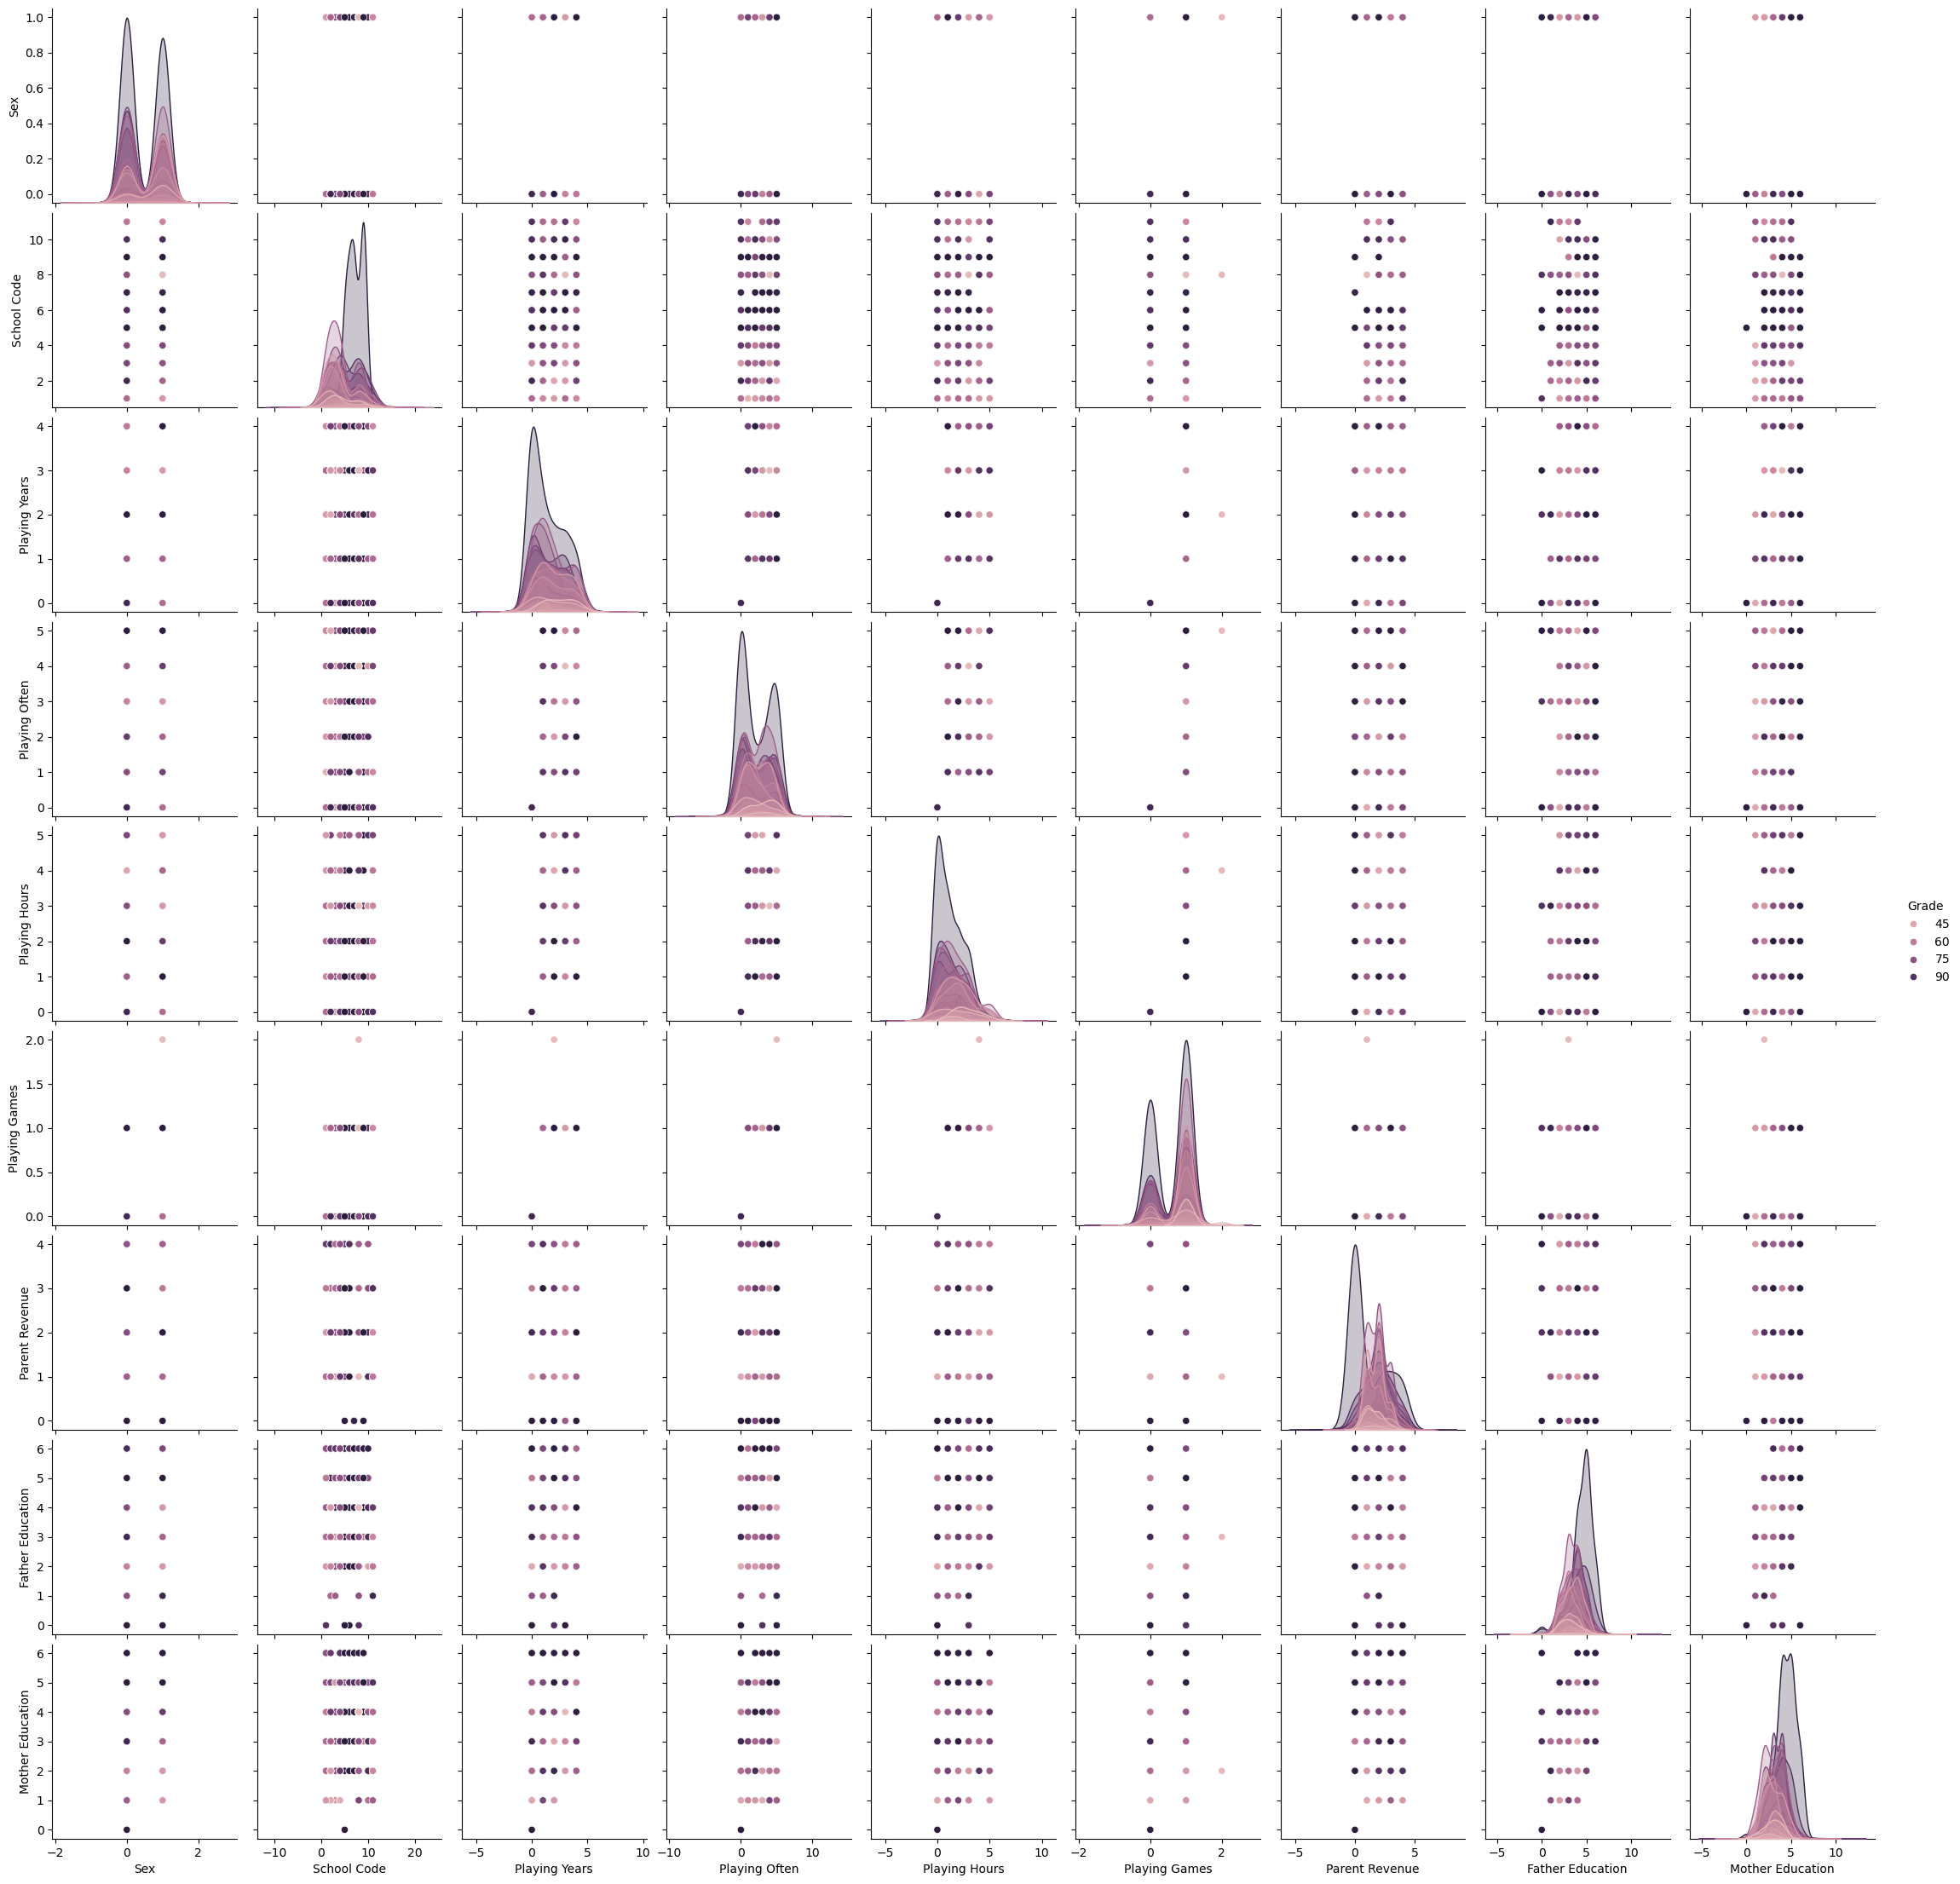

In [100]:
sns.pairplot(grade_g,hue='Grade')
plt.show()

## Training and Testing Data

In [108]:
from sklearn.model_selection import train_test_split

In [116]:
X=grade_g.drop('Grade',axis=1)
y=grade_g['Grade']

In [118]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training the Model

In [120]:
from sklearn.linear_model import LinearRegression

In [122]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

**coefficients of the model**

In [130]:
print(lm.coef_)

[-2.82426437e+00  9.70724840e-01  2.99717704e-01  1.85049916e+00
 -1.33299806e-01 -8.91022140e+00 -6.09581492e-03  2.11714789e+00
  3.36047171e+00]


## Predicting Test Data

In [132]:
pred=lm.predict(X_test)

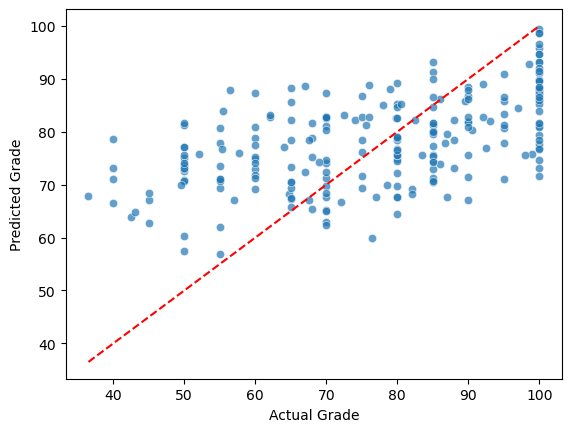

Text(0, 0.5, 'Predicted Grade')

In [190]:
sns.scatterplot(x=y_test,y=pred,alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')

## Residuals

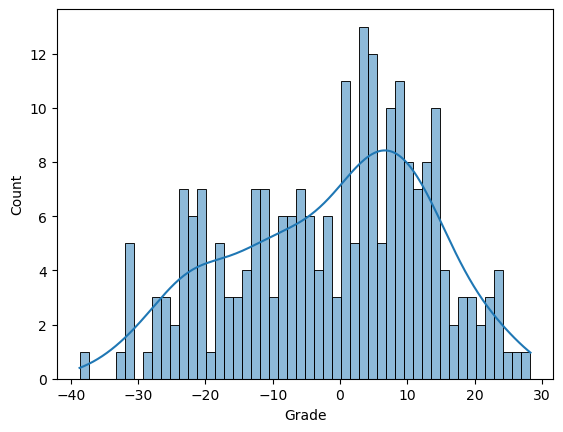

In [182]:
sns.histplot(y_test-pred,kde=True,bins=50)
plt.show()

## Evaluating the Model

In [186]:
from sklearn import metrics

In [188]:
print('Mean Absolute Error (MAE)',metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error (MSE):',metrics.mean_squared_error(y_test,pred))
print('R-squared Score (R²): ',np.sqrt(metrics.root_mean_squared_error(y_test,pred)))

Mean Absolute Error (MAE) 12.046710992662574
Mean Squared Error (MSE): 211.78953767212946
R-squared Score (R²):  3.8148382243467784


## Conclusion

In [140]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

,Coefficient
Sex,-2.824264
School Code,0.970725
Playing Years,0.299718
Playing Often,1.850499
Playing Hours,-0.133300
Playing Games,-8.910221
Parent Revenue,-0.006096
Father Education,2.117148
Mother Education,3.360472
